In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
len(df)

150

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='petal_length', ylabel='petal_width'>

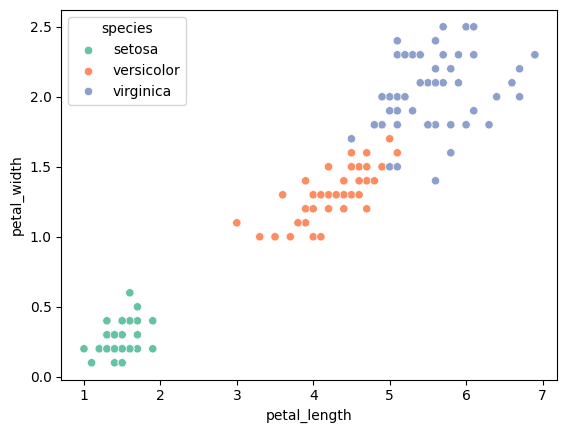

In [6]:
sb.scatterplot(x='petal_length', y='petal_width', data=df, palette="Set2", hue=df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

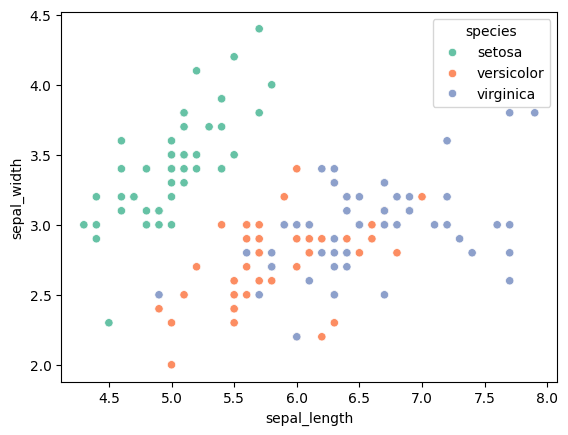

In [7]:
sb.scatterplot(x='sepal_length', y='sepal_width', data=df, palette="Set2", hue=df['species'])

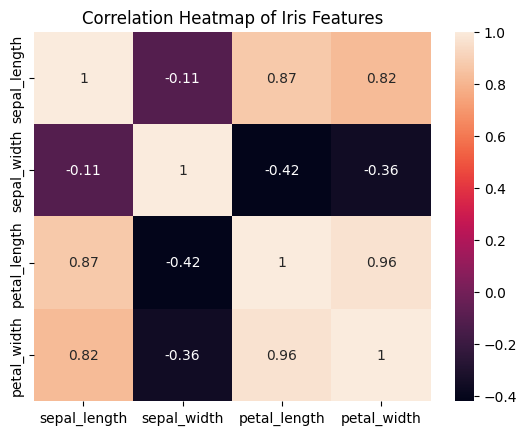

In [31]:

# ------ CORRELATION HEATMAP OF NUMERIC FEATURES ------

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# Create heatmap
sb.heatmap(corr, annot=True)
plt.title('Correlation Heatmap of Iris Features')

plt.show()

In [32]:
X = df.drop('species', axis='columns')
y = df['species']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='saga', multi_class='auto', max_iter=5000)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
c = np.logspace(0, 10, 20)
param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio, 'C':c}
model = GridSearchCV(model, param_grid=param_grid)
model.fit(X_train, y_train)

c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: User

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [34]:
model.best_params_

{'C': 37.926901907322495, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [38]:
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

1.0
[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]


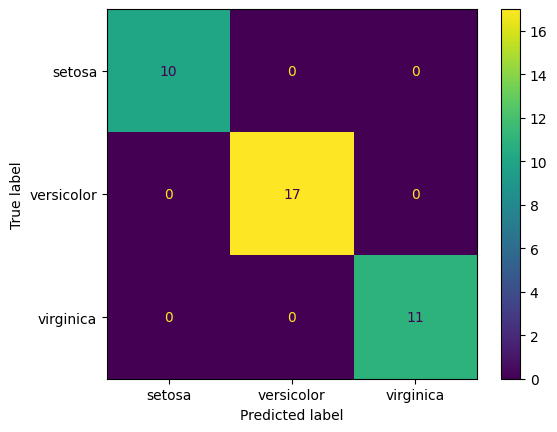

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
model_accuracy_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(model_accuracy_score)
model_confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(model_confusion_matrix)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



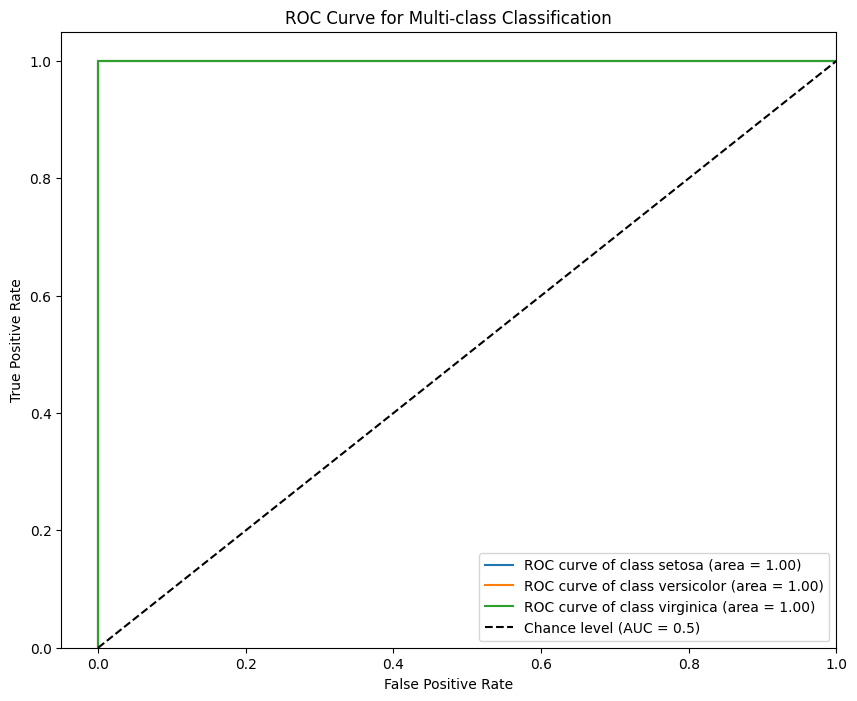

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Turning classes into binary format
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# Predictive possibilities for each class
y_score = model.predict_proba(X_test)

# Adjusting the size
plt.figure(figsize=(10, 8))

# Plotting a ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(
        fpr[i], 
        tpr[i], 
        label=f'ROC curve of class {class_name} (area = {roc_auc[i]:0.2f})'
    )

# Reference line
plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')

# Plot settings
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

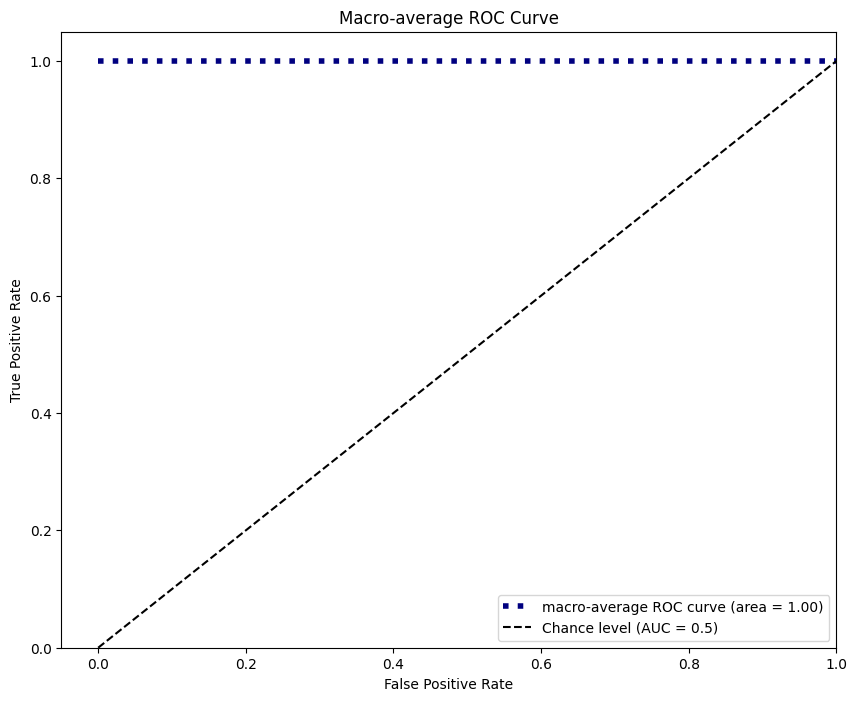

In [ ]:
# Calculate the avarage Weight and Macro ROC curve
# First Macro average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)
macro_roc_auc = auc(all_fpr, mean_tpr)

plt.figure(figsize=(10, 8))
plt.plot(
    all_fpr, 
    mean_tpr, 
    label=f'macro-average ROC curve (area = {macro_roc_auc:0.2f})',
    color='navy', 
    linestyle=':', 
    linewidth=4
)

# Reference line
plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')

# Plot settings
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")
plt.show()